Requirements:
- pandas
- openpyxl
- xlrd
- matplotlib

In [1]:
import pandas as pd

## Data loading
Merge all the monthly RDA reports.

In [5]:
# computer:
import socket
hostname = socket.gethostname()

if hostname == 'arch':
    directory = '/home/sergio/Documents/TELMEX/Productividad/Datos/2020/rda/'
else:
    directory = '/home/sergio/Documents/Telmex/Productividad/Data/2020/rda/'


file_prefix = 'rdat_metro'

df = pd.DataFrame()

import os
rda_files = []
columns = []
for f in os.listdir(directory):
    if f.startswith(file_prefix):
        df_tmp = pd.read_excel(directory + f, sheet_name='base')
        #print(f, '-', df_tmp.shape)
        columns.append(df_tmp.columns)
        df = df.append(df_tmp)
        
#print(df.shape)

Pick just the ones related to CM_AB

In [4]:
# df = df[df['CMANTENI'] == 'CMABS']
# print('Data frame shape:', df.shape)

Split columns by type

In [6]:
#print(ab.dtypes)
date_cols = df.select_dtypes('datetime')
int_cols = df.select_dtypes('number')
obj_cols = df.select_dtypes(object)
#print(date_cols.shape)
#print(int_cols.shape)
#print(obj_cols.shape)

---
# Date data

In [ ]:
'''
# Some testing
months = date_cols['FECHA_REAL'].dt.month
ab_MONTH = ab.join(months, rsuffix='_MONTH')
ab_MONTH[['FECHA_REAL', 'FECHA_REAL_MONTH']]
'''

----
### Count by days

In [8]:
instances_by_day = df['FECHA_REAL'].dt.floor('d').value_counts()
df_instances_by_day = pd.DataFrame(instances_by_day)
cm = 'CMABS'
df_instances_by_day['CM_INSTANCES'] = df[df['CMANTENI'] == 'CMABS']['FECHA_REAL'].dt.floor('d').value_counts()
#xs = instances_by_day.index
#ys = instances_by_day.values

In [9]:
df_instances_by_day = df_instances_by_day.fillna(0)
df_instances_by_day[df_instances_by_day['CM_INSTANCES'] > 0].head()
# normalization
df_instances_by_day = df_instances_by_day / df_instances_by_day.max()
# sorting by index
df_instances_by_day = df_instances_by_day.sort_index()

In [10]:
df_instances_by_day

,FECHA_REAL,CM_INSTANCES
2020-01-01,0.062500,0.0
2020-01-02,0.312500,0.0
2020-01-03,0.343750,0.0
2020-01-04,0.078125,0.0
2020-01-05,0.156250,0.0
...,...,...
2020-12-27,0.125000,0.0
2020-12-28,0.453125,0.0
2020-12-29,0.281250,0.0
2020-12-30,0.546875,0.0


In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

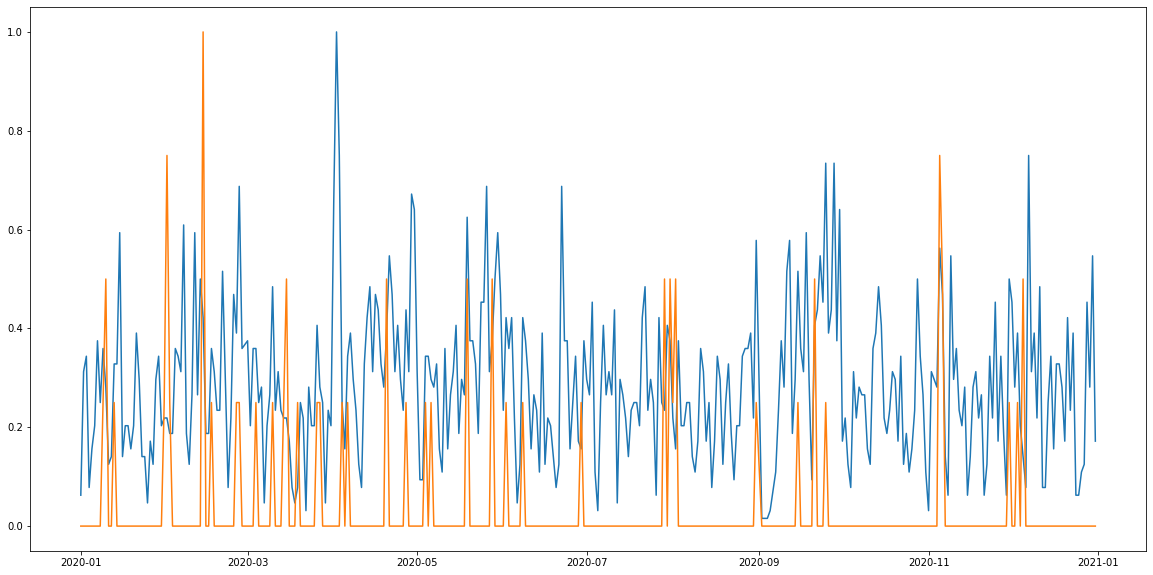

In [12]:
plt.plot(df_instances_by_day.index, df_instances_by_day['FECHA_REAL'], label = "line 1")
plt.plot(df_instances_by_day.index, df_instances_by_day['CM_INSTANCES'], label = "line 2")
plt.show()

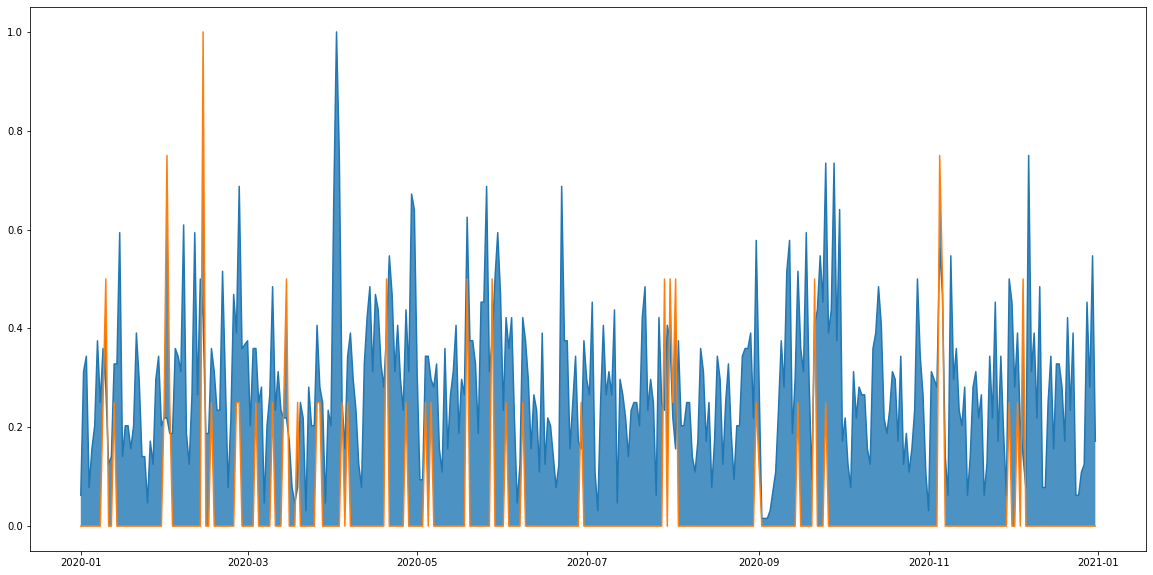

In [13]:
fig, ax = plt.subplots()
ax.plot(df_instances_by_day.index, df_instances_by_day['FECHA_REAL'], label = "line 1")
ax.fill_between(df_instances_by_day.index, df_instances_by_day['FECHA_REAL'], df_instances_by_day['CM_INSTANCES'], alpha=0.8)
ax.plot(df_instances_by_day.index, df_instances_by_day['CM_INSTANCES'], label = "line 2")

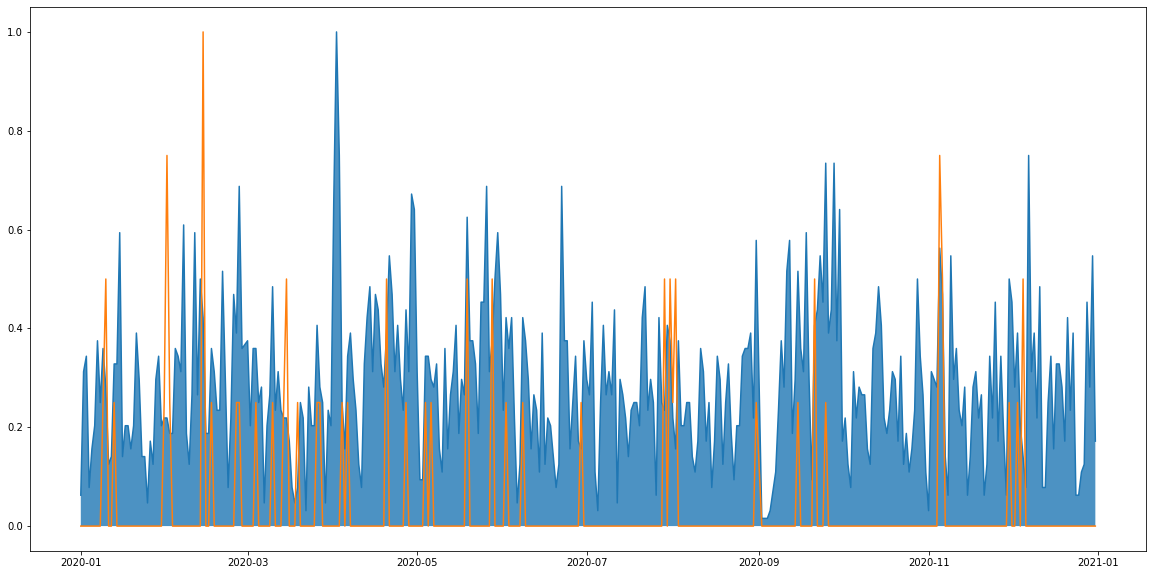

In [14]:
fig, ax = plt.subplots()
ax.plot(df_instances_by_day.index, df_instances_by_day['FECHA_REAL'], label = "line 1")
ax.fill_between(df_instances_by_day.index, df_instances_by_day['FECHA_REAL'], 0, alpha=0.8)
ax.plot(df_instances_by_day.index, df_instances_by_day['CM_INSTANCES'], label = "line 2")

### Count by months

In [15]:
instances_by_month = df['FECHA_REAL'].groupby([df.FECHA_REAL.dt.year, df.FECHA_REAL.dt.month]).agg('count')
instances_by_month = pd.DataFrame(instances_by_month)
instances_by_month['year_month'] = instances_by_month.index.to_series().apply(lambda x: '{0}-{1:02}'.format(*x))
instances_by_month = instances_by_month.set_index('year_month')
instances_by_month = instances_by_month.rename(columns = {'FECHA_REAL': 'instancias'})
#instances_by_month

---
# Plotting

In [16]:
import seaborn as sns

In [17]:
df = pd.DataFrame(instances_by_day)
df = df.sort_index()

Plotting instances by day

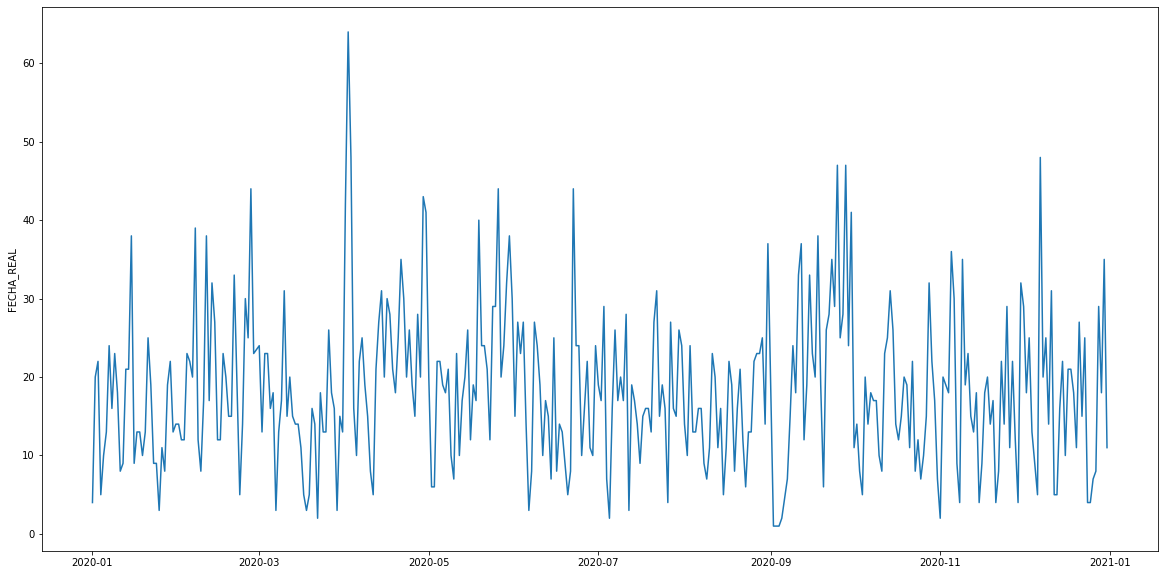

In [18]:
sns.lineplot(x =df.index, y = 'FECHA_REAL', data=df);

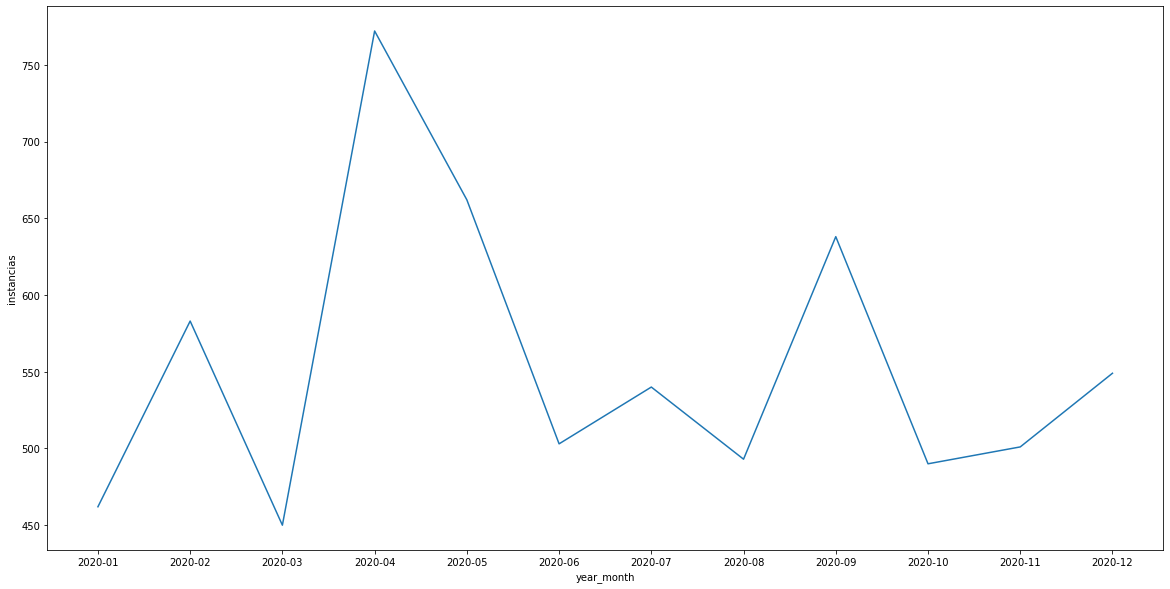

In [19]:
sns.lineplot(x ='year_month', y = 'instancias', data=instances_by_month);

### Making it smoother
This gets complicated, because to make it smoother, a model needs to be found so that it 'emulates' the points with a softer line.